# Predict Clicked Ads Customer Classification by Using Machine Learning
##### Lana Fuadi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
dataku = pd.read_csv('Clicked Ads Dataset.csv')

In [4]:
data = dataku.copy()

## EXPLORATORY DATA ANALYSIS

In [7]:
data.sample(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
274,274,73.10,28,399103880.0,242.37,Perempuan,1/25/2016 7:52,No,Jakarta Utara,Daerah Khusus Ibukota Jakarta,Fashion
155,155,87.98,38,396463130.0,222.11,Laki-Laki,3/31/2016 10:44,No,Malang,Jawa Timur,Furniture
642,642,76.07,36,476234780.0,235.56,Perempuan,1/23/2016 1:42,No,Tangerang Selatan,Banten,Health
813,813,74.18,28,489119260.0,203.87,Perempuan,1/20/2016 2:31,No,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,House
810,810,43.16,29,354665500.0,143.04,Laki-Laki,3/5/2016 20:53,Yes,Bekasi,Jawa Barat,Furniture


In [5]:
print('Our dataset consist of', data.shape[0], 'rows and', data.shape[1], 'columns.')

Our dataset consist of 1000 rows and 11 columns.


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [11]:
data.isna().sum().sum()

40

In [7]:
data.duplicated().sum()

0

Analysis
* Unnamed: 0 is not important, thus we will drop it.
* Timestamp should be in datetime, not in object type.
* We will change long feature names to be shorter and have same pattern.
* There is no duplicated value.
* There are 40 missing values, we will handle it later.

In [14]:
data = data.drop('Unnamed: 0', axis=1)

In [15]:
data.columns

Index(['DailySiteSpent', 'Age', 'Income', 'DailyNetSpent', 'Gender',
       'DateTime', 'ClickOnAd', 'City', 'Province', 'Category'],
      dtype='object')

In [16]:
names = {'Daily Time Spent on Site' : 'DailySiteSpent',
         'Age'                      : 'Age',
         'Area Income'              : 'Income',
         'Daily Internet Usage'     : 'DailyNetSpent',
         'Male'                     : 'Gender',
         'Timestamp'                : 'DateTime',
         'Clicked on Ad'            : 'ClickOnAd',
         'city'                     : 'City',
         'province'                 : 'Province',
         'category'                 : 'Category'}
data = data.rename(columns=names)

In [17]:
data['DateTime'] = pd.to_datetime(data['DateTime'])

In [18]:
# data = data.dropna()

## Statistical Analysis

In [19]:
num        = data.select_dtypes(exclude=['object', 'datetime64'])
num_column = num.columns
cat        = data.select_dtypes(include='object')
cat_column = cat.columns
date       = data.select_dtypes(include='datetime64')
target     = data['ClickOnAd']

#### Numerical Features

In [87]:
num.describe().T

,count,mean,std,min,25%,50%,75%,max
DailySiteSpent,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
DailyNetSpent,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


Insight:
* The users have ages ranging from 19 years to 61 years, while the average age of the users is 35 years.
* The average income of the users is 384.864.670,64.
* On average, the users spend 180 minutes per day on the internet.
* On average, the users spend 65 minutes per day on the site.

#### Categorical Features

In [93]:
cat.describe().T

,count,unique,top,freq
Gender,997,2,Perempuan,518
ClickOnAd,1000,2,No,500
City,1000,30,Surabaya,64
Province,1000,16,Daerah Khusus Ibukota Jakarta,253
Category,1000,10,Otomotif,112


Insight:
* The most frequent gender is 'Perempuan' (female) that appears 518 times out of 997, which slightly higher compare to male.
* ClickOnAd has balance distribution, with 500 'No' and 500 'Yes'.
* 'Surabaya' is the most frequently occuring in City, which appears 64 times.
* 'DKI Jakarta' is the most frequently occuring in Province, which appears 253 times.
* The most frequently occcuring category is 'Otomotif' (Automotive), which appears 112 times.

## Visual Analysis

#### Univariate Analysis

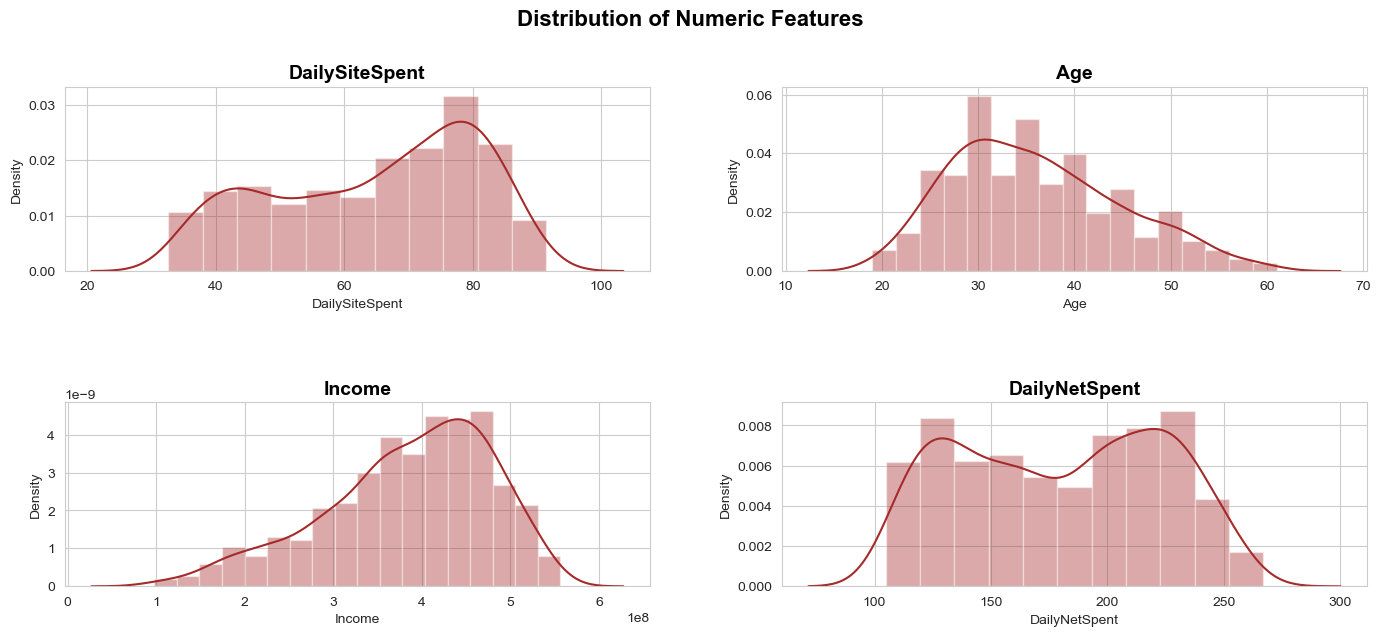

In [40]:
plt.figure(figsize=(15, 7))
for i in range(len(num_column)):
    plt.subplot(2, 2, i+1)
    sns.distplot(data[num_column[i]], color='brown')
    plt.title(num_column[i], fontsize=14, color='black', fontweight='bold')
    plt.tight_layout(pad=5)
plt.suptitle('Distribution of Numeric Features', fontsize=16, color='black', fontweight='bold')
plt.show()

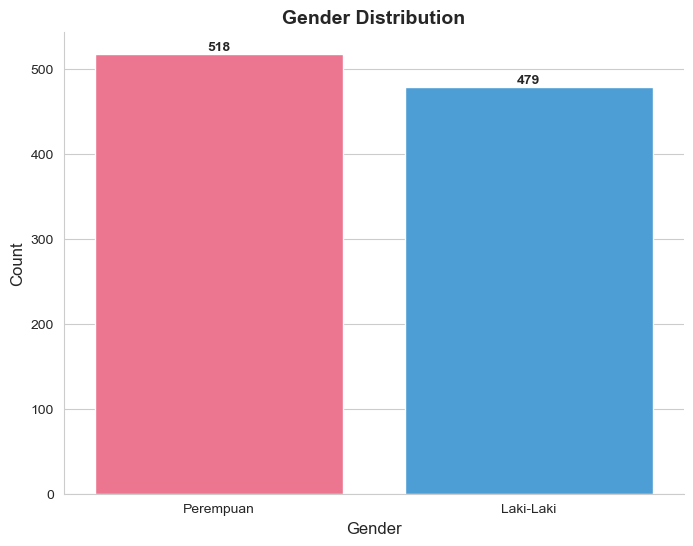

In [42]:
plt.figure(figsize=(8, 6))
colors = ['#FF6384', '#36A2EB'] 
ax = sns.countplot(data=data, x='Gender', palette=colors)
sns.despine()
plt.title('Gender Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.show()

* we have more female user (518) than male user (479).

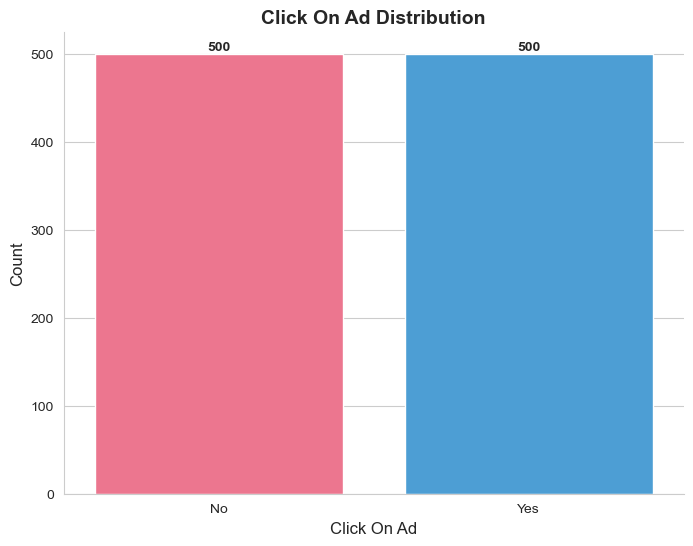

In [41]:
plt.figure(figsize=(8, 6))
colors = ['#FF6384', '#36A2EB'] 
ax = sns.countplot(data=data, x='ClickOnAd', palette=colors)
sns.despine()
plt.title('Click On Ad Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Click On Ad', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.show()


* ClickOnAd has balance distribution with 500 user did not click the ad and 500 user click the ad.

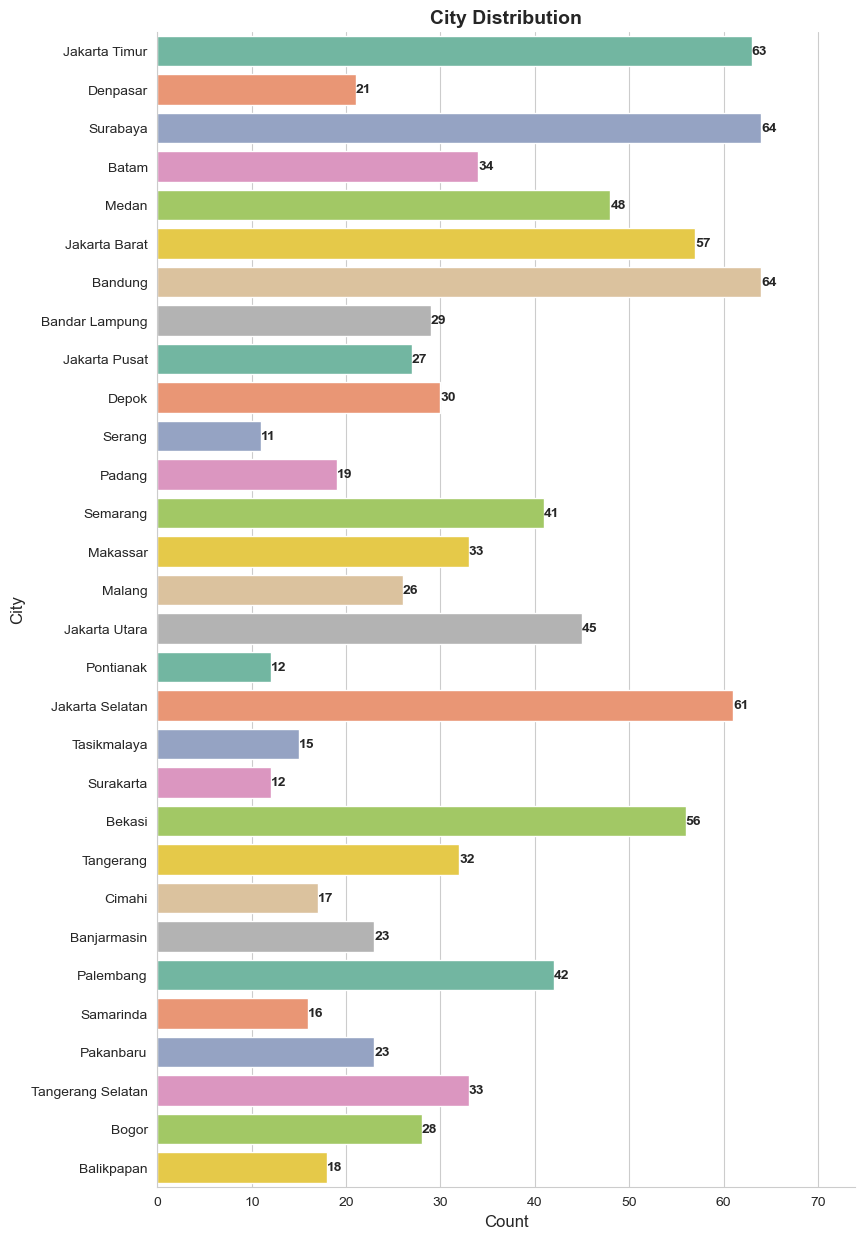

In [36]:
plt.figure(figsize=(9, 15))
ax = sns.countplot(data=data, y='City', palette='Set2')
sns.despine()
plt.title('City Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width)}', (width, p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=10, fontweight='bold')
plt.xlim(0, ax.get_xlim()[1] * 1.1)
plt.show()


* Bandung, Surabaya, Jakarta Timur, and Jakarta Selatan contribute the most with each has more than 60 users.
* Serang contributes the less with 11 users, followed by Surakarta and Pontianak with each has 12 users.

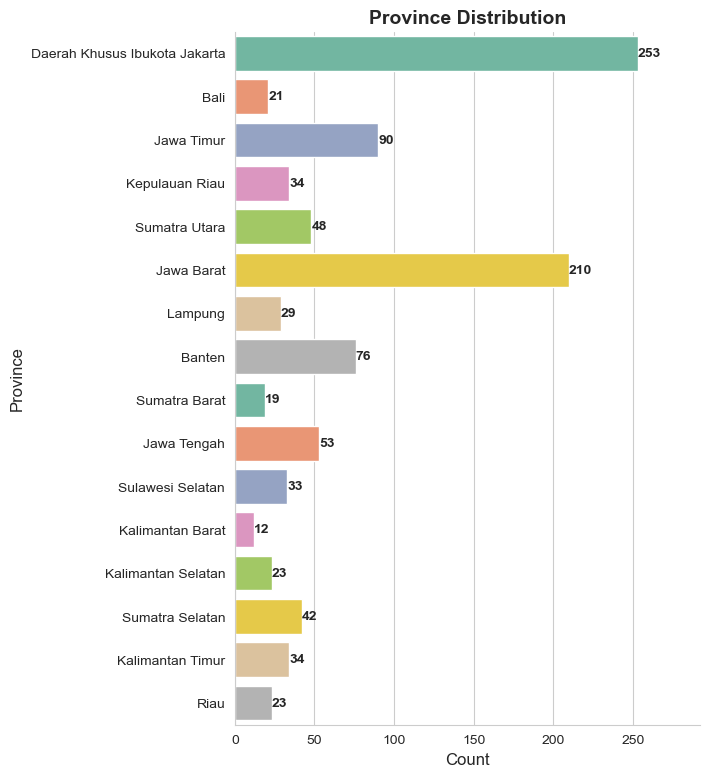

In [37]:
plt.figure(figsize=(6, 9))
ax = sns.countplot(data=data, y='Province', palette='Set2')
sns.despine()
plt.title('Province Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Province', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width)}', (width, p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=10, fontweight='bold')
plt.xlim(0, ax.get_xlim()[1] * 1.1)
plt.show()


* DKI Jakarta contributes the most with 244 users, followed by Jawa Barat with 205 users.
* Kalimantan Barat contributes the less with 12 users, followed by Sumatera Barat and Bali with each has 19 users.

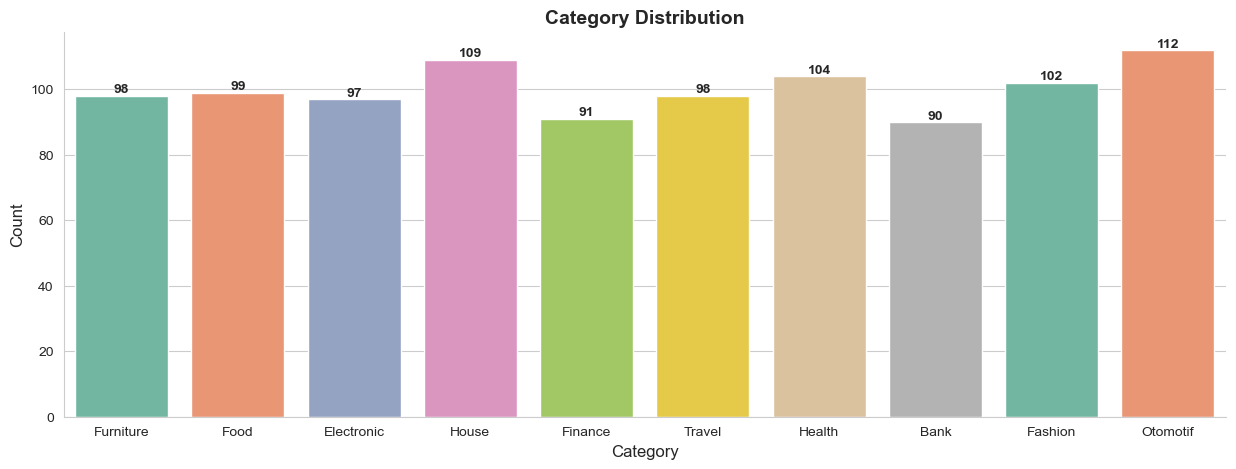

In [53]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=data, x='Category', palette='Set2')
sns.despine()
plt.title('Category Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.show()


* Otomotif contributes the most with 112 count, followed by House (109), Health (104), and Fashion (102).
* Bank contributes the less with 90 count, followed by Finance (91).

#### Bivariate Analysis

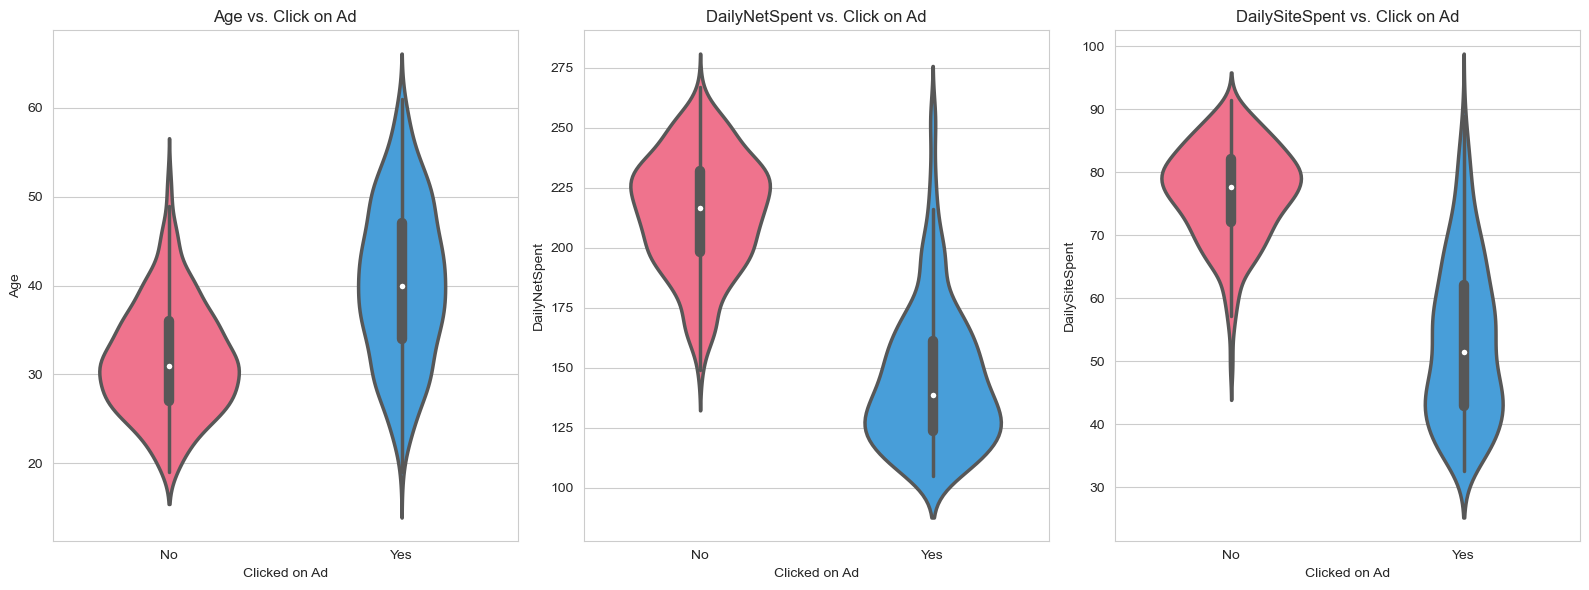

In [56]:
sns.set_style('whitegrid')
colors = ['#FF6384', '#36A2EB'] 
sns.set_palette(sns.color_palette(colors))
features = ['Age', 'DailyNetSpent', 'DailySiteSpent']
num_plots = len(features)
fig, axes = plt.subplots(1, num_plots, figsize=(16, 6))
for i, feature in enumerate(features):
    ax = axes[i]
    ax.set_title(f'{feature} vs. Click on Ad')
    sns.violinplot(x='ClickOnAd', y=feature, data=data, linewidth=2.5, width=0.6, saturation=0.8, ax=ax)
    ax.set_xlabel('Clicked on Ad')
    ax.set_ylabel(feature)
plt.tight_layout()
plt.show()

Insight:
1. Age
    * the density of no is highest around age of 30, indicating that users in their 30s are less likely to click on ads.
    * the density of yes is highest around age of 40, indicating that users in their 40s are more likely to click on ads.
    * no distribution appears wider and shorter, indicating that it has a higher density and lower variablity.
    * yes distribution appears slimer and longer, indicating that it has a lower density and higher variability.
    * no distribution has a longer tail towards higher ages, indicating that it has a positive skew and has outlier.
2. DailyNetSpent
    * the density of no is highest around minutes of 225, indicating that users who has daily spent around 225 minutes on internet are less likely to click on ads.
    * the density of yes is highest around minutes of 125, indicating that users who has daily spent around 125 minutes on internet are more likely to click on ads.
    * no distribution appears shorter, indicating that it has a lower variablity.
    * yes distribution appears longer, indicating that it has a higher variability.
    * no distribution has a longer tail towards lower minutes, indicating that it has a negative skew and has outlier.
    * yes distribution has a very long tail towards higher minutes, indicating that it has a high positive skew and has outlier.
3. DailySiteSpent
    * the density of no is highest around minutes of 79, indicating that users who has daily spent around 79 minutes on internet are less likely to click on ads.
    * the density of yes is highest around minutes of 42, indicating that users who has daily spent around 42 minutes on internet are more likely to click on ads.
    * no distribution appears wider and shorter, indicating that it has a higher density and lower variablity.
    * yes distribution appears slimer and longer, indicating that it has a lower density and higher variability.
    * no distribution has a longer tail towards lower minutes, indicating that it has a negative skew and has outlier.
    * yes distribution has a longer tail towards higher minutes, indicating that it has a positive skew and has outlier.

#### Multivariate Analysis

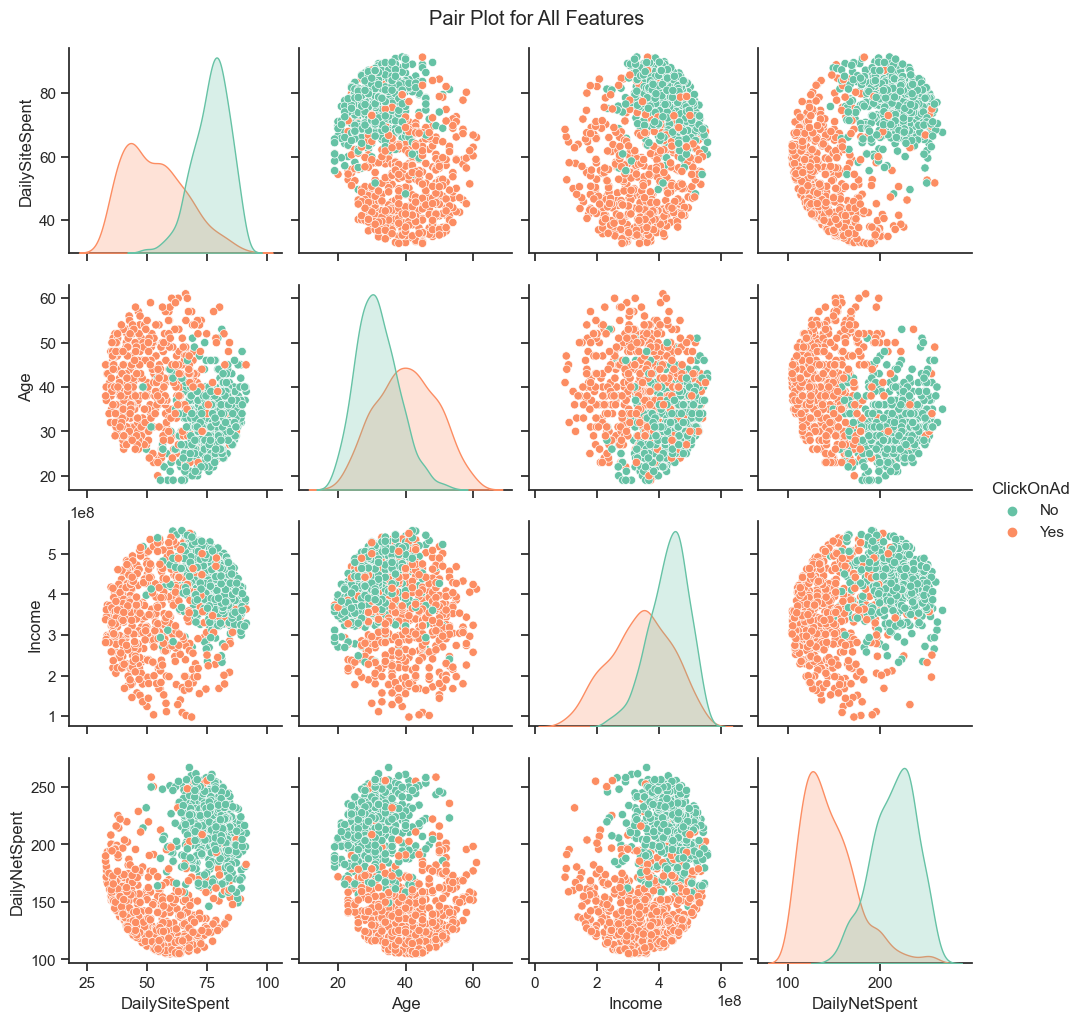

In [65]:
# Set style and color palette
sns.set(style="ticks", palette="Set2")

# Create pair plot
sns.pairplot(data=data, hue='ClickOnAd')

# Set plot title
plt.suptitle('Pair Plot for All Features', y=1.02)

# Show the plot
plt.show()

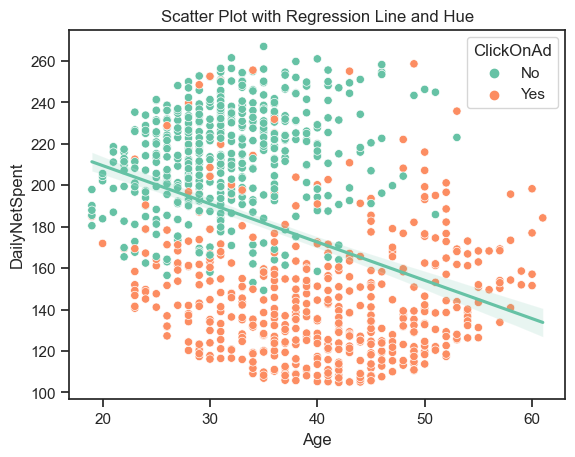

In [75]:
sns.set(style="ticks", palette="Set2")
sns.scatterplot(x='Age', y='DailyNetSpent', hue='ClickOnAd', data=data)
sns.regplot(x='Age', y='DailyNetSpent', data=data, scatter=False)
plt.title('Scatter Plot with Regression Line and Hue')
plt.show()

Insight:
* The scatter plot appears that there is a higher concentration of green points in the upper left part of the plot (lower age values and higher daily internet spending), indicating that the younger users who spend more minutes on the internet tend not to click on ads.
* On the other hand, the orange points seem to be more spread out across the plot, indicating that older users who spend more minutes on the internet or younger users tend to click on ads.
* The regression line is higher on the left and lower in the right side of the plot, indicating a negative relationship between age and daily internet spending. it means as age increases, daily internet spending tends to decrease.

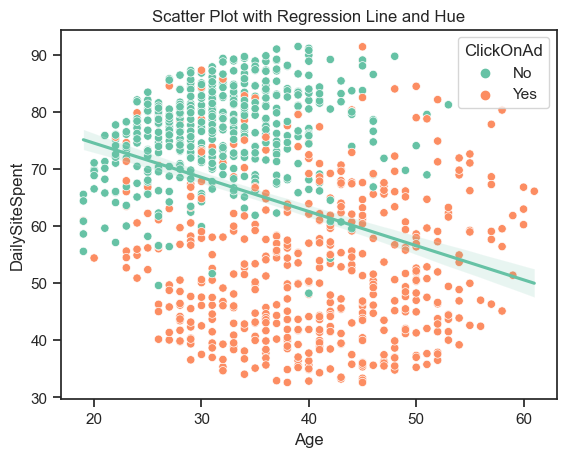

In [77]:
sns.set(style="ticks", palette="Set2")
sns.scatterplot(x='Age', y='DailySiteSpent', hue='ClickOnAd', data=data)
sns.regplot(x='Age', y='DailySiteSpent', data=data, scatter=False)
plt.title('Scatter Plot with Regression Line and Hue')
plt.show()

Insight:
* The scatter plot appears that there is a higher concentration of green points in the upper left part of the plot (lower age values and higher daily internet spending), indicating that the younger users who spend more minutes on the site tend not to click on ads.
* On the other hand, the orange points seem to be more spread out across the plot, indicating that older users who spend more minutes on the site or younger users tend to click on ads.
* The regression line is higher on the left and lower in the right side of the plot, indicating a negative relationship between age and daily site spending. it means as age increases, daily site spending tends to decrease.

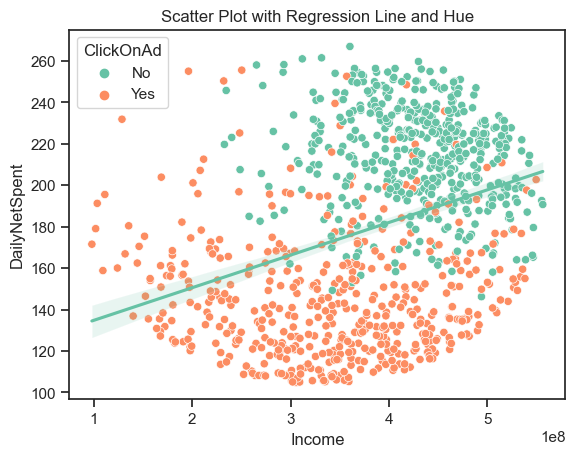

In [78]:
sns.set(style="ticks", palette="Set2")
sns.scatterplot(x='Income', y='DailyNetSpent', hue='ClickOnAd', data=data)
sns.regplot(x='Income', y='DailyNetSpent', data=data, scatter=False)
plt.title('Scatter Plot with Regression Line and Hue')
plt.show()

Insight:
* The scatter plot appears that there is a higher concentration of green points in the upper right part of the plot (higher income values and higher daily internet spending), indicating that the higher income users who spend more minutes on the internet tend not to click on ads.
* On the other hand, the orange points seem to be more spread out across the plot, indicating that higher income users who spend more minutes on the internet or lower income users tend to click on ads.
* The regression line is lower on the left and higher in the right side of the plot, indicating a positive relationship between income and daily site spending. it means as income increases, daily internet spending tends to increase.

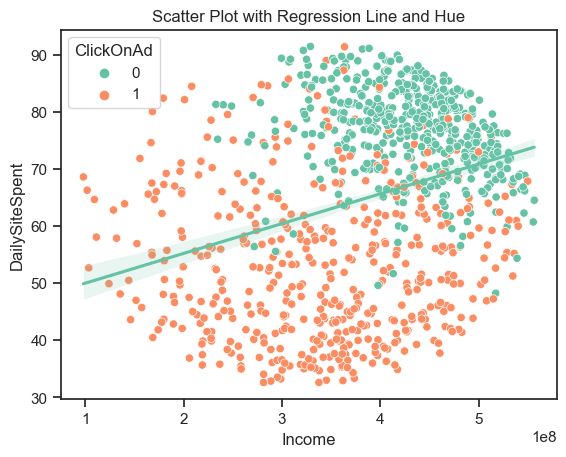

In [120]:
sns.set(style="ticks", palette="Set2")
sns.scatterplot(x='Income', y='DailySiteSpent', hue='ClickOnAd', data=data)
sns.regplot(x='Income', y='DailySiteSpent', data=data, scatter=False)
plt.title('Scatter Plot with Regression Line and Hue')
plt.show()

In [96]:
datas = data.copy()

In [107]:
data = datas.copy()

In [115]:
num_column

Index(['DailySiteSpent', 'Age', 'Income', 'DailyNetSpent'], dtype='object')

In [116]:
cat_column

Index(['Gender', 'ClickOnAd', 'City', 'Province', 'Category'], dtype='object')

In [108]:
data['Gender']    = data['Gender'].replace({'Perempuan': 0, 'Laki-Laki': 1})
data['ClickOnAd'] = data['ClickOnAd'].replace({'No': 0, 'Yes': 1})

In [117]:
features = ['DailySiteSpent', 'DailyNetSpent', 'Age', 'Income', 'Gender', 'ClickOnAd']

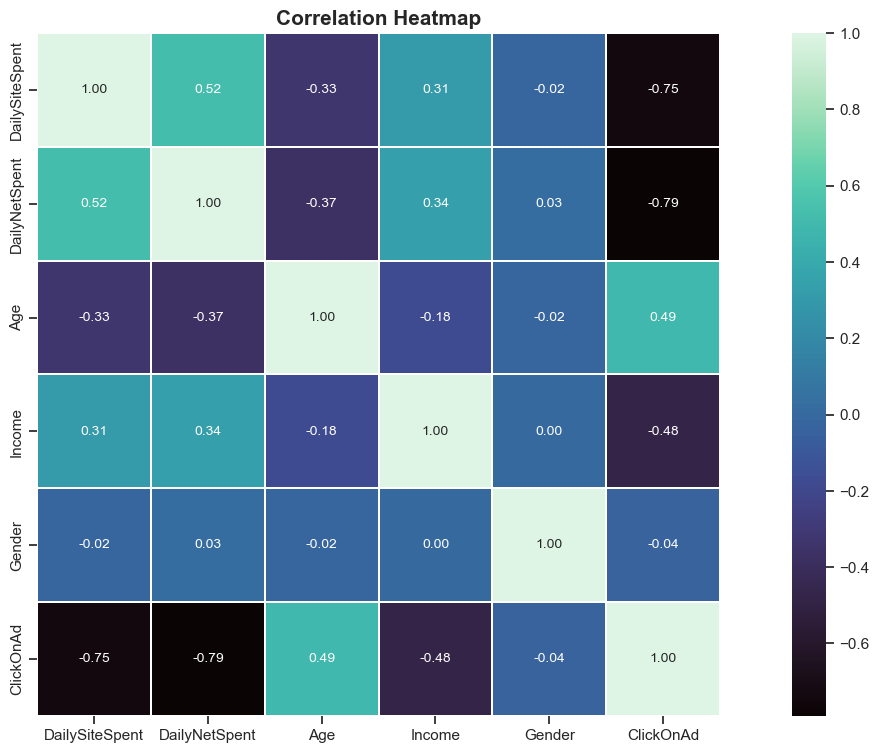

In [118]:
# Correlation plot
plt.figure(figsize=(16, 9))
corrmat = data[features].corr()
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, cmap='mako', annot=True, fmt='.2f', vmin=corrmat.values.min(), vmax=1, square=True, linewidths=0.1, annot_kws={'fontsize':10})
plt.title('Correlation Heatmap', fontsize=15, fontweight='bold')
plt.tight_layout(pad=5)
plt.show()

Insight:
* No multicollinearity found on the correlation heatmap.
* DailySiteSpent and DailyNetSpent has high negative correlation to ClickOnAd, indicating that as DailyNetSpent or DailySiteSpent increases, users tend to click on ad.
* Age has positive correlation to ClickOnAd, indicating that older users are more likely to click on ad.
* Income has negative correlation to ClickOnAd, indicating that higher income users are less likely to click on ad.
* Gender has no significant correlation to ClickOnAd.